# Checking Tensile Test Data

The function below is the same as the one used in matflow singlecrystal paramter fitting example https://github.com/LightForm-group/UoM-CSF-matflow/blob/master/workflows/single_crystal_parameter_fitting.yml


In [1]:
import matplotlib.pyplot as plt

In [2]:
from formable.tensile_test import TensileTest
from formable.utils import read_non_uniform_csv
import sys
import hickle
from pathlib import Path
import numpy as np
def read_tensile_test_CSV(
    CSV_file_path,
    CSV_arguments,
    eng_stress_col_index,
    eng_strain_col_index,
    true_stress_col_index,
    true_strain_col_index,
    stress_units,
):

    _, CSV_data = read_non_uniform_csv(
        CSV_file_path,
        delimiter=CSV_arguments.get("delimiter"),
        skip_rows=CSV_arguments.get("skip_rows"),
        header_row=CSV_arguments.get("header_row"),
    )

    eng_strain, eng_stress = None, None
    true_strain, true_stress = None, None

    if eng_strain_col_index is not None:
        eng_strain = CSV_data[:, eng_strain_col_index]
        eng_stress = CSV_data[:, eng_stress_col_index]
        stress = eng_stress

    elif true_strain_col_index is not None:
        true_strain = CSV_data[:, true_strain_col_index]
        true_stress = CSV_data[:, true_stress_col_index]
        stress = true_stress

    if stress_units.strip().upper() == "MPA":
        stress *= 1e6
    elif stress_units.strip().upper() == "GPA":
        stress *= 1e9

    tensile_test_obj = TensileTest(
        eng_stress=eng_stress,
        eng_strain=eng_strain,
        true_stress=true_stress,
        true_strain=true_strain,
    )

    tensile_test = tensile_test_obj.to_dict()

    return tensile_test

### Checking the CSV data
change the file path and other varibles for your data and run the two cells below. SHould get true stress strain graph of your data

In [3]:
## Change for your data
true_strain_col_index= 3 # 0 is left most column
true_stress_col_index= 2 
eng_strain_col_index = None
eng_stress_col_index = None

## Change for your data
stress_units="PA" # MPA or GPA
CSV_arguments = {"delimiter":',',"skip_rows":1,"header_row":0}
CSV_file_path = r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Hanwen\T6 tensile data.csv"

TensileTest_data = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index= eng_strain_col_index,eng_stress_col_index= eng_stress_col_index,stress_units="MPA",true_stress_col_index=true_stress_col_index,true_strain_col_index=true_strain_col_index)

Text(0.5, 0, 'True Strain')

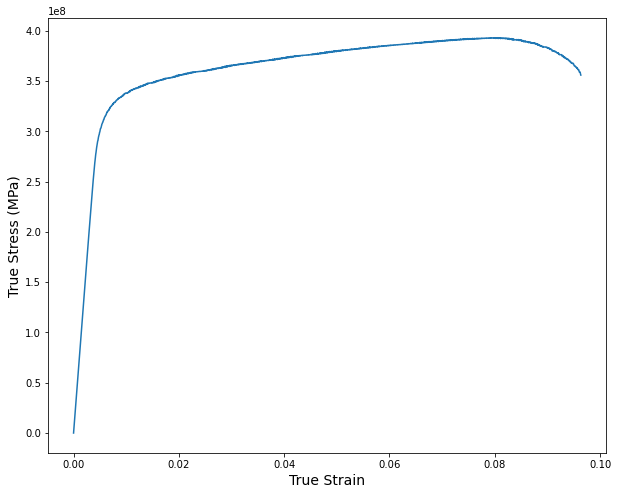

In [4]:
# true stress strain graph
plt.figure(figsize=[10,8])
plt.plot(TensileTest_data['true_strain'],TensileTest_data['true_stress'])
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

# Workflow Analysis

May need to: 
* install matflow -> pip install matflow
* update matflow -> pip install -U matflow
* install version of matflow -> pip install matflow==0.2.15 (0.2.15 is an example version)

### Required Modules

In [5]:
from matflow import load_workflow
import matplotlib.pyplot as plt
import numpy as np

Change the path to the your workflow results

In [6]:
path  = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\damask_plastic_parameter_fitting_2021-05-06-102824"
workflow = load_workflow(path)

Loading matflow config from C:\Users\Laura\.matflow\config.yml
Loading task schemas from 1 file(s)...OK!
Loading software definitions from 1 file(s)...OK!


### Plotting simulations

Text(0.5, 0, 'Strain')

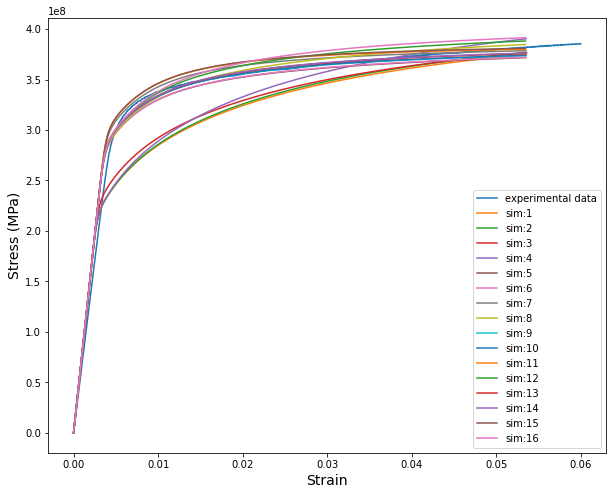

In [7]:
plt.figure(figsize=[10,8])

exp_stress = workflow.tasks[5].elements[0].outputs.tensile_test['true_stress'] # experimental
exp_strain = workflow.tasks[5].elements[0].outputs.tensile_test['true_strain'] # experimental
plt.plot(exp_strain,exp_stress,label='experimental data')

for n in range(len(workflow.tasks[6].elements)):
#for n in range(0,4):
    stress = workflow.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
    strain = workflow.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
  
    plt.plot(strain,stress,label=f'sim:{n+1}')



plt.legend()
plt.ylabel('Stress (MPa)',size=14)
plt.xlabel('Strain',size=14)

In [8]:
for n in range(len(workflow.tasks[6].elements)):
#for n in range(0,4):
    print(workflow.tasks[6].elements[n].inputs.single_crystal_parameters)

{'Al': {'h_0_sl_sl': 7000000000.0, 'xi_0_sl': [100000000.0], 'xi_inf_sl': [160000000.0]}}
{'Al': {'h_0_sl_sl': 7000000000.0, 'xi_0_sl': [100000000.0], 'xi_inf_sl': [160000000.0]}}
{'Al': {'h_0_sl_sl': 7000000000.0, 'xi_0_sl': [100000000.0], 'xi_inf_sl': [160000000.0]}}
{'Al': {'h_0_sl_sl': 7000000000.0, 'xi_0_sl': [100000000.0], 'xi_inf_sl': [160000000.0]}}
{'Al': {'h_0_sl_sl': 11213593573.514704, 'xi_0_sl': [129055452.53539927], 'xi_inf_sl': [145733358.7460098]}}
{'Al': {'h_0_sl_sl': 11213593573.514704, 'xi_0_sl': [129055452.53539927], 'xi_inf_sl': [145733358.7460098]}}
{'Al': {'h_0_sl_sl': 11213593573.514704, 'xi_0_sl': [129055452.53539927], 'xi_inf_sl': [145733358.7460098]}}
{'Al': {'h_0_sl_sl': 11213593573.514704, 'xi_0_sl': [129055452.53539927], 'xi_inf_sl': [145733358.7460098]}}
{'Al': {'h_0_sl_sl': 18930972782.28232, 'xi_0_sl': [130621233.79650201], 'xi_inf_sl': [143534948.74608973]}}
{'Al': {'h_0_sl_sl': 18930972782.28232, 'xi_0_sl': [130621233.79650201], 'xi_inf_sl': [14353494

### Comparison of fit parameters

In [9]:
for n in range(len(workflow.tasks[7].elements)):
    h_0_sl_sl = workflow.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['h_0_sl_sl']
    xi_0_sl = workflow.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_0_sl']
    xi_inf_sl = workflow.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_inf_sl']
    print(f'Sim:{n+1}')
    print(f'h_0_sl_sl:{h_0_sl_sl}')
    print(f'xi_0_sl:{xi_0_sl}')
    print(f'xi_inf_sl:{xi_inf_sl}')
    print('')

Sim:1
h_0_sl_sl:11213593573.514704
xi_0_sl:[129055452.53539927]
xi_inf_sl:[145733358.7460098]

Sim:2
h_0_sl_sl:18930972782.28232
xi_0_sl:[130621233.79650201]
xi_inf_sl:[143534948.74608973]

Sim:3
h_0_sl_sl:24603230628.809834
xi_0_sl:[130602181.81344117]
xi_inf_sl:[143538296.85465053]

Sim:4
h_0_sl_sl:25060150470.555008
xi_0_sl:[130588557.20111187]
xi_inf_sl:[143545650.39527494]



## Running Uniaxial with fit parameters

Take the last Simulaitons plastic parameters and run a unixail DAMASK sim with them to compare with experimental data

In [10]:
path  = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Uniaxial_tensile_test_2021-05-24-114053"
workflow_plane_strain = load_workflow(path)

In [11]:
workflow_plane_strain.tasks[5].elements[0].outputs # should say Parameters('volume_element_response')

Parameters('volume_element_response')

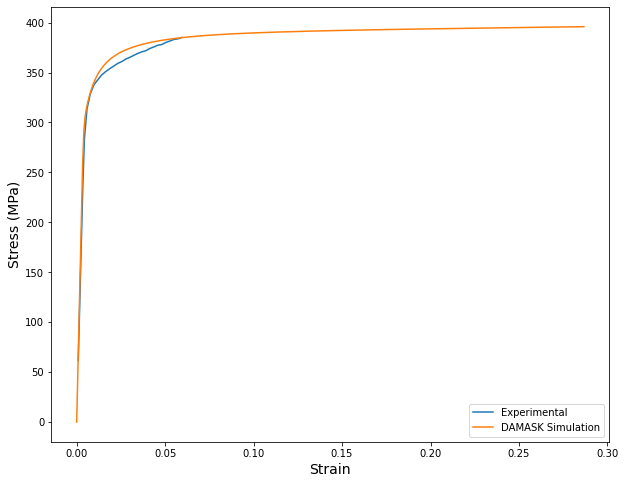

In [12]:
plt.figure(figsize=[10,8])

stress = workflow_plane_strain.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
strain = workflow_plane_strain.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']

exp_stress = workflow.tasks[5].elements[0].outputs.tensile_test['true_stress'] # experimental
exp_strain = workflow.tasks[5].elements[0].outputs.tensile_test['true_strain'] # experimental

plt.plot(exp_strain[0:-1:50],np.array(exp_stress[1:-1:50])/1e6,label='Experimental')
plt.plot(strain,stress/1e6,label='DAMASK Simulation')
plt.ylabel('Stress (MPa)',size=14)
plt.xlabel('Strain',size=14)
plt.legend()

## Running Plane Strain with fit parameters

In [13]:
path  = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\Plane_strain_tension_2021-05-28-124357"
workflow_plane_strain = load_workflow(path)

In [14]:
workflow_plane_strain.tasks[5].elements[0].outputs # should say Parameters('volume_element_response')

Parameters('volume_element_response')

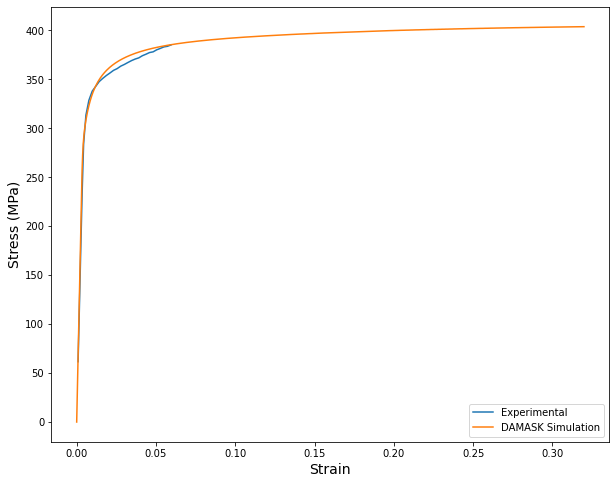

In [15]:
plt.figure(figsize=[10,8])

stress = workflow_plane_strain.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
strain = workflow_plane_strain.tasks[5].elements[0].outputs.volume_element_response['vol_avg_equivalent_strain']['data']

exp_stress = workflow.tasks[5].elements[0].outputs.tensile_test['true_stress'] # experimental
exp_strain = workflow.tasks[5].elements[0].outputs.tensile_test['true_strain'] # experimental

plt.plot(exp_strain[0:-1:50],np.array(exp_stress[1:-1:50])/1e6,label='Experimental')
plt.plot(strain,stress/1e6,label='DAMASK Simulation')
plt.ylabel('Stress (MPa)',size=14)
plt.xlabel('Strain',size=14)
plt.legend()

## Stress_strain heatmaps

In [16]:
import damask
import matplotlib.pyplot as plt
hdf5_path = r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura\
Uniaxial_tensile_test_2021-05-11-003249/task_6_simulate_volume_element_loading_uniaxial/geom_load.hdf5"
inc = 2

def draw_ss_heatmaps(hdf5_path, inc):
    """ Print stress-strain heatmaps from DAMASK results"""
    result = damask.Test(hdf5_path)
    result.pick('increments', result.increments[inc])
    Strain_vM=result.read_dataset(result.get_dataset_location('epsilon_V^0.0(F)_vM'))
    Stress_vM=result.read_dataset(result.get_dataset_location('sigma_vM'))
    df= pd.DataFrame(np.vstack((Strain_vM.T,Stress_vM.T)).T,columns=['epsilon','sigma'])
    #adjust xlim and ylim to your situation
    h=sns.jointplot(x=df["epsilon"], y=df["sigma"], kind='kde',color='k',space=0,n_levels=40,\
              xlim={0,0.16},ylim={5e7,15e7},joint_kws={'thresh':False})
    h.set_axis_labels('$\epsilon_{11}$', '$\sigma_{VM}$ Pa', fontsize=18)
    print("Saving SS_heatmap_inc"+str(inc)+".png to cwd")
    plt.savefig('SS_heatmap_inc'+str(inc)+'.png')
    plt.close()
    
draw_ss_heatmaps(hdf5_path, inc)

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
import damask.